

---

# <center> Klasifikasi Data Kanker

---



####  Link Presentation Power Point



[PPT Presentation](https://drive.google.com/file/d/1X6Mqz3cdXctfhJERolQU-8_uhR3VVMAt/view?usp=sharing)

---

# <center> Business Understanding

---

Masalah: Masih adanya kesalahan diagnosis dalam dunia medis, khususnya dalam mendiagnosis seseorang yang terkena kanker (baik ganas maupun jinak).

Question:
- Bagaimana memprediksi pasien kanker ganas maupun jinak menggunakan AI(Machine learning) ?
- Saran dan rekomendasi apa yang bisa diberikan untuk pihak terkait (misalnya: dokter, dll) dalam memprediski seorang pasien terkena kanker ganas atau jinak ?

---

# <center>Analytics Approach

---

Penelitian ini menggunakan pendekatan machine learning, dimana algoritma yang digunakan untuk melakukan klasifikasi data kanker tersebut adalah decision tree dengan hyperparameter xgboost

## Connect to Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Install Modul/Package

In [ ]:
!pip install pydotplus

## Import Modul/Package

In [ ]:
#Memasukan modul yang digunakan
import warnings; warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pydotplus
import xgboost as xgb
from sklearn import *
from xgboost.sklearn import XGBClassifier
from IPython.display import display
from IPython.display import Image 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn import metrics
from xgboost import plot_importance
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score


%matplotlib inline

---

# <center>  Data Collection

---

## Sumber Dataset 

Sumber : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

## Import Dataset

In [ ]:
# #import data dari website
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
# data = pd.read_csv(url, header = None)
# #melihat 5 data pertama
# data.head()

In [ ]:
#Import Data dari Gdrive
path = "/content/gdrive/My Drive/Colab Notebooks/Raspiani_Project_Akhir_FGA_Data_Science/BreastCancerWisconsinDataSet.csv"
data = pd.read_csv(path)

## Data Preview

In [ ]:
#Ukuran Data
N, P = data.shape
print('baris = ', N, ', Kolom = ', P)

#Menampilkan 5 sampel data
display(data.sample(5).T)

baris =  569 , Kolom =  32


,86,427,481,208,142
id,86135501,90745,91227,8810158,869218
diagnosis,M,B,B,B,B
radius_mean,14.48,10.8,13.9,13.11,11.43
texture_mean,21.46,21.98,19.24,22.54,17.31
perimeter_mean,94.25,68.79,88.73,87.02,73.66
area_mean,648.2,359.9,602.9,529.4,398
smoothness_mean,0.09444,0.08801,0.07991,0.1002,0.1092
compactness_mean,0.09947,0.05743,0.05326,0.1483,0.09486
concavity_mean,0.1204,0.03614,0.02995,0.08705,0.02031
concave points_mean,0.04938,0.01404,0.0207,0.05102,0.01861


In [ ]:
df = data

---


# <center> Data Understanding dan Data Preparation


---

## Melihat Info Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Mengubah Tipe Data (Tipe data kolom dignosis menjadi numerik)

Bahan Bacaan:
* https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

In [ ]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
# converting diagnosis M/B to numerical
lenc = LabelEncoder()
lenc.fit(df['diagnosis'])
df['diagnosis'] = lenc.transform(df['diagnosis'])

df.head(2)

#M = Malignant = Ganas = 1 dan B = Benign = Jinak = 0

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


## Cek Missing Value

In [ ]:
#memeriksa missing value secara keseluruhan
df.isnull().any().any()

False

In [ ]:
#memeriksa missing value dengan melihat jumlahnya pada kolomnya masing-masing
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Cek Duplikasi Data

In [ ]:
#drop id
df.drop(columns='id', axis=1, inplace=True)
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
#mengecek apakah ada duplikat data?
print(df.shape)
df.duplicated().sum()

(569, 31)


0

## Cek/ Melihat Sebaran Data

In [ ]:
#membuat pairwise plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

## Statistika Deskriptif

In [ ]:
#statistika deskriptif
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


## Data Visualisasi (Variabel Diagnosis)


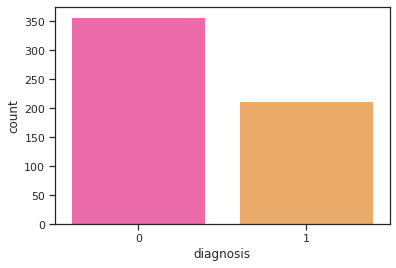

In [ ]:
p = sns.countplot(df.diagnosis, data=df, palette = 'spring')

## Split Data

In [ ]:
# X are all the features (columns) that might be useful to the model
# y is the target (diagnosis column)

X, y = df.drop(['diagnosis'], axis=1), df[['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print("X_Train: {}, X_test: {}, y_train: {}, y_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_Train: (455, 30), X_test: (114, 30), y_train: (455, 1), y_test: (114, 1)


In [ ]:
print("Banyaknya kelas 0 yaitu", len(y_train[y_train.diagnosis == 0]))
print("Banyaknya kelas 1 yaitu", len(y_train[y_train.diagnosis == 1]))

Banyaknya kelas 0 yaitu 285
Banyaknya kelas 1 yaitu 170


---

# <center> Modelling

---

## Decision Tree Algorithm

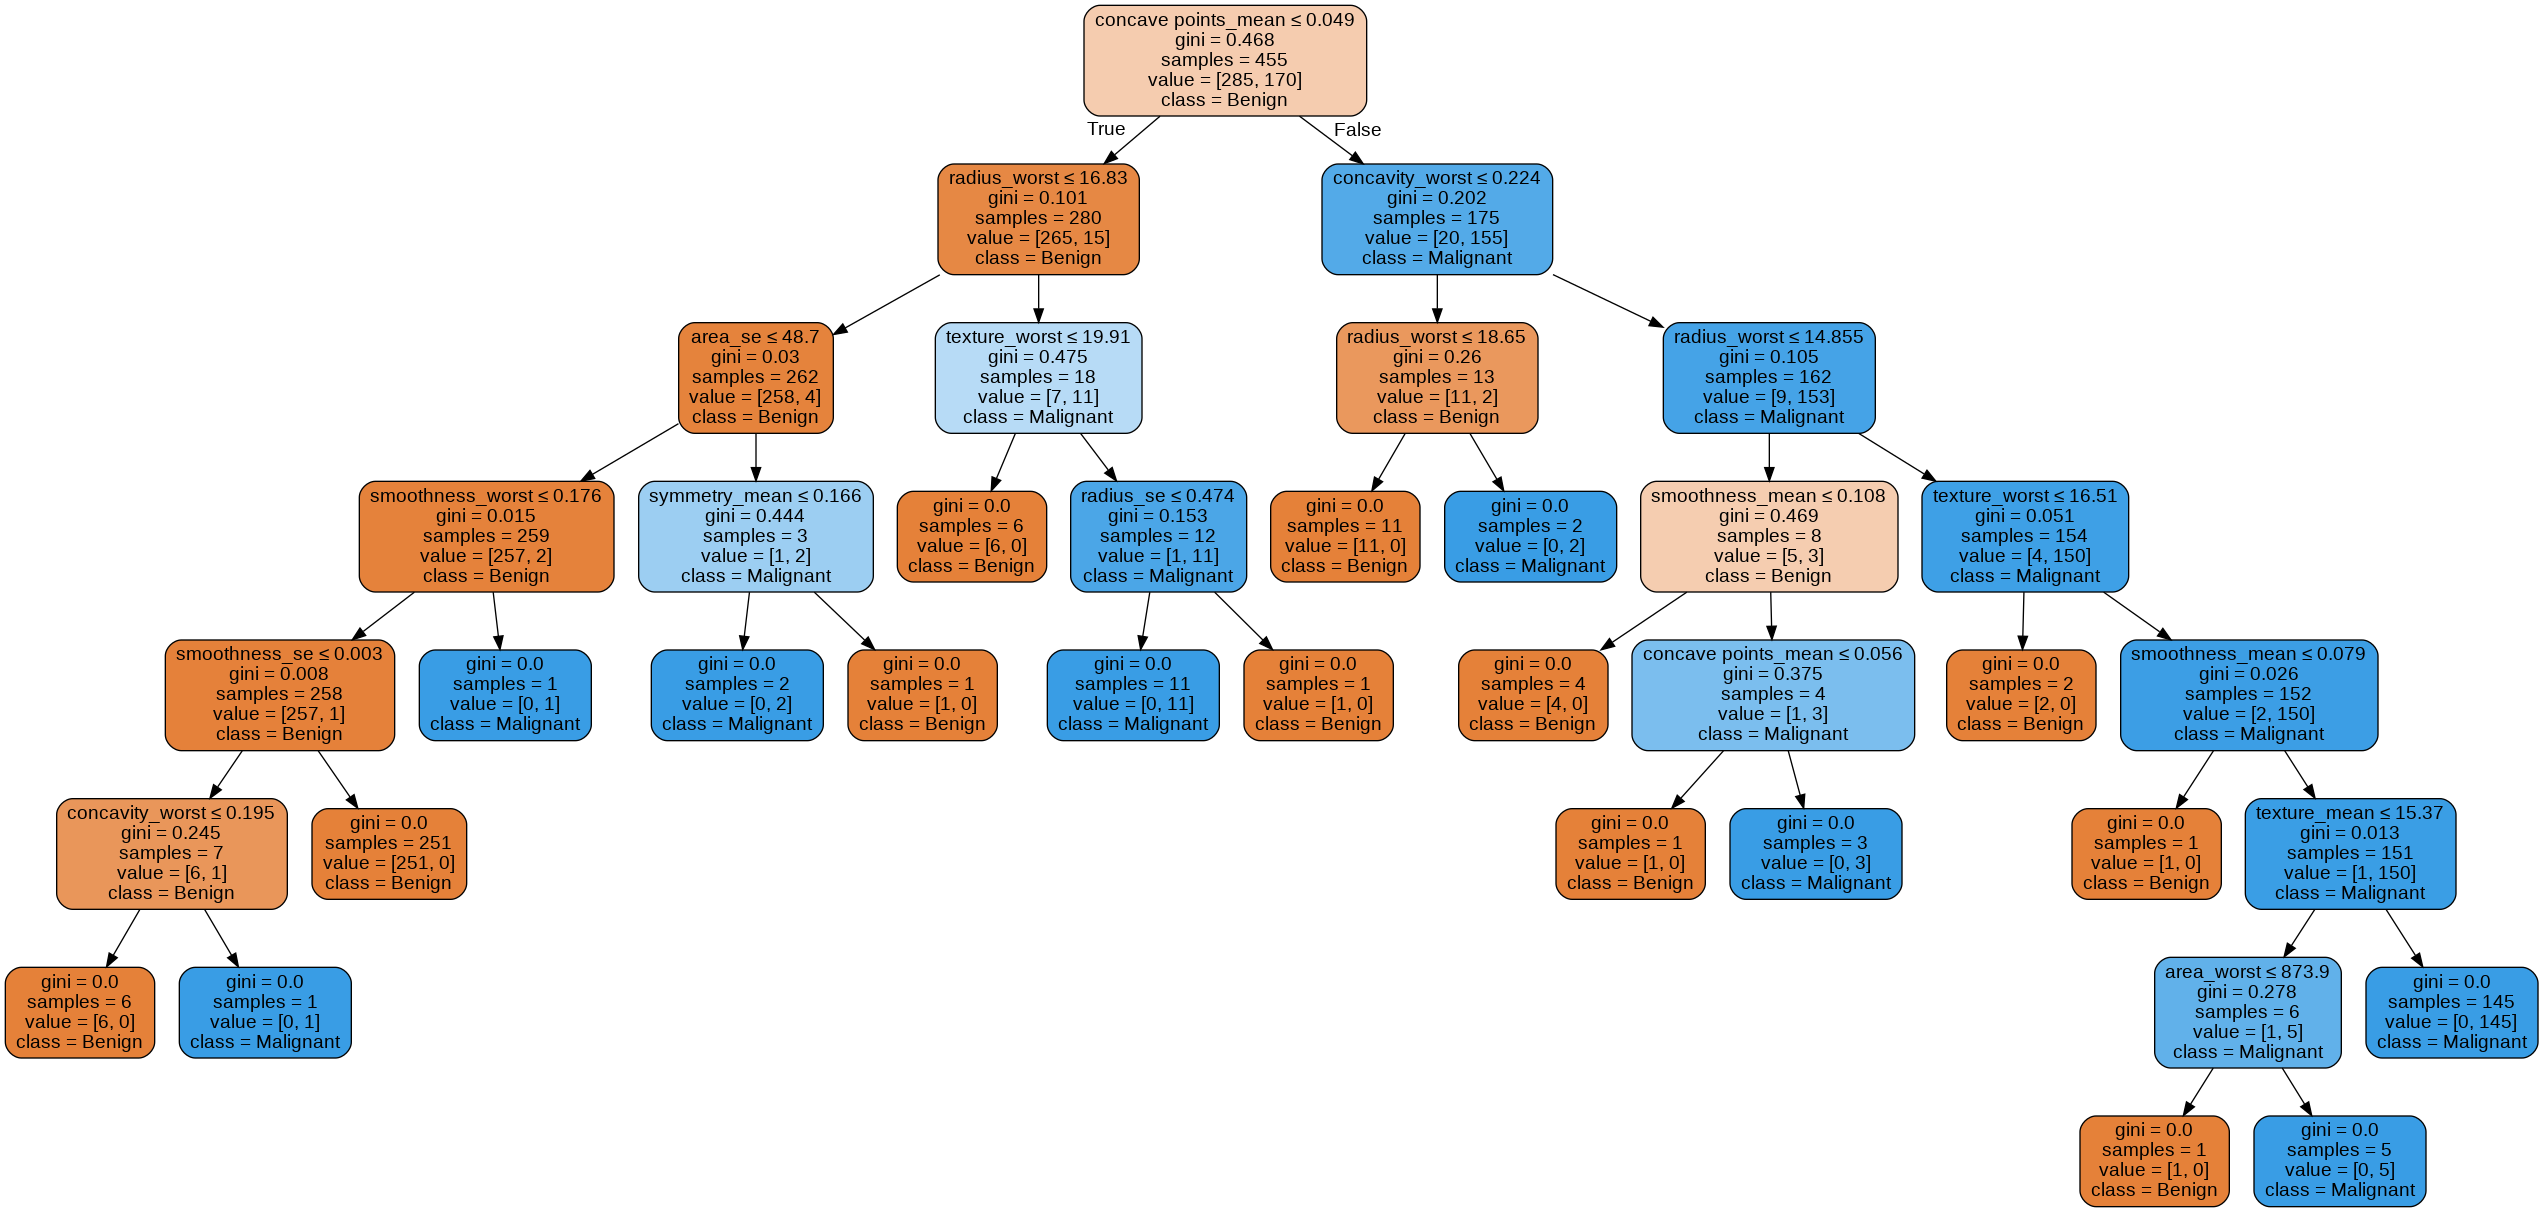

In [ ]:
from sklearn import tree
import pydotplus
from IPython.display import Image 

# list of features we want to consider
splitting_features = [x for x in X_train.columns if x not in ['id']]

# initializing the tree model and training it
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)

# generating a graphic for the tree
dot_data = tree.export_graphviz(tree_model, 
                                out_file=None, 
                                feature_names=splitting_features, 
                                class_names = ['Benign', 'Malignant'], 
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Interpreting a tree graphic<a class="anchor" id="bullet-10"></a>
Each rectangle represents a **node** of the tree.
* The first line in each node identifies the splitting feature and decision being made upon it.
* The observations are separated based on this decision into **children** nodes (left and right).
* **Samples**: how many observations have been filtered by that decision.
* **Value**: where how many observations are being split into the left and right children respectively.
* **Gini**: a measurement of incorrect classification. As the algorithm learns, the gini inequality decreases to 0.
* **Class**: the target that the observations have been grouped into: benign or malignant.
* The rectangles at the bottom of the diagram are called **leaves**, which contain the final predictions (observations classified by diagnosis).

* Baris pertama di setiap node mengidentifikasi fitur pemisahan dan keputusan yang dibuat untuknya.
* Pengamatan dipisahkan berdasarkan keputusan ini menjadi node ** anak ** (kiri dan kanan).
* ** Sampel **: berapa banyak observasi yang telah difilter oleh keputusan itu.
* ** Nilai **: di mana berapa banyak pengamatan yang dipisahkan masing-masing menjadi anak kiri dan kanan.
* ** Gini **: pengukuran klasifikasi yang salah. Saat algoritme belajar, ketimpangan gini berkurang menjadi 0.
* ** Kelas **: target pengamatan yang telah dikelompokkan menjadi: jinak atau ganas.
* Persegi panjang di bagian bawah diagram disebut ** daun **, yang berisi prediksi akhir (pengamatan diklasifikasikan berdasarkan diagnosis).

How a decision tree learns
Applying the general learning outline to a decision tree:

1. Initialize the algorithm to produce a default model, and give it the feature data. The algorithm makes its first set of predictions (close to a random guess).
The default model is the very first splitting feature - the algorithm chose 'concave points mean <= 0.0492'. The observations are divided into benign or malignant based on this decision, making up the first set of predictions!

2. The algorithm measures the error between its previous prediction and the true value of the targets.
This error is quantified by the gini value that appears in the first node of the tree.

3. The algorithm adjusts its model-building to make the error smaller. Each adjustment represents a part of the pattern it is learning, and is used to process future data.
The adjustment is the next splitting feature that is chosen for each subgroup that resulted from the concave points mean decision. The algorithm chose 'radius worst' for observations that had a concave points mean less than the threshold, and 'concavity worst' for observations with concave points mean greater than the threshold.

4. It continues to predict, calculate error, and adjust.
The next set of predictions are the classifications that result from the second round of decision making. Each time, a gini value is calculated to indicate how far the classifications are from the true targets, and another set of splitting features are chosen to further refine the class groupings.

Bagaimana pohon keputusan belajar Menerapkan garis besar pembelajaran umum (bagian 1.3) ke pohon keputusan:

1. Inisialisasi algoritme untuk menghasilkan model default, dan berikan data fitur. Algoritme membuat rangkaian prediksi pertamanya (mendekati tebakan acak). Model default adalah fitur pemisahan pertama - algoritme memilih 'mean poin cekung <= 0,0492'. Pengamatan dibagi menjadi jinak atau ganas berdasarkan keputusan ini, membuat rangkaian prediksi pertama!

2. Algoritme mengukur kesalahan antara prediksi sebelumnya dan nilai sebenarnya dari target. Kesalahan ini diukur dengan nilai gini yang muncul di simpul pertama pohon.

3. Algoritme menyesuaikan pembangunan modelnya untuk memperkecil kesalahan. Setiap penyesuaian mewakili bagian dari pola yang dipelajari, dan digunakan untuk memproses data di masa mendatang. Penyesuaian adalah fitur pemisahan berikutnya yang dipilih untuk setiap subkelompok yang dihasilkan dari keputusan rata-rata titik cekung. Algoritma memilih 'radius terburuk' untuk pengamatan yang memiliki mean titik cekung kurang dari ambang batas, dan 'cekung terburuk' untuk pengamatan dengan mean titik cekung lebih besar dari ambang batas.

4. Itu terus memprediksi, menghitung kesalahan, dan menyesuaikan. Prediksi berikutnya adalah klasifikasi yang dihasilkan dari pengambilan keputusan putaran kedua. Setiap kali, nilai gini dihitung untuk menunjukkan seberapa jauh klasifikasi dari target yang sebenarnya, dan satu set fitur pemisahan dipilih untuk lebih menyempurnakan pengelompokan kelas.

---

# <center> Evaluation

---

In [ ]:
from sklearn import metrics

#Predict test set:
test_predictions = tree_model.predict(X_test[splitting_features])
test_predprob = tree_model.predict_proba(X_test[splitting_features])[:,1]
        
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(y_test['diagnosis'].values, test_predictions))
print("AUC Score: %f" % metrics.roc_auc_score(y_test['diagnosis'], test_predprob))

Accuracy : 0.9386
AUC Score: 0.941468


The model gives ~94% accuracy for all cases, and a ~94% probability of catching malignant cases in the data. Each time the code is run, the algorithm may learn slightly differently (that is, select different splitting features), which results in slight variations in accuracy and AUC scores. In the following section, you work on improving the model by stacking together many trees, and tuning parameters for better generalization ability.

Model ini memberikan ~ 94% akurasi untuk semua kasus, dan ~ 94% kemungkinan menangkap kasus ganas dalam data. Setiap kali kode dijalankan, algoritme mungkin belajar sedikit berbeda (yaitu, memilih fitur pemisahan yang berbeda), yang menghasilkan sedikit variasi dalam akurasi dan skor AUC. Di bagian berikut, Anda bekerja untuk meningkatkan model dengan menumpuk banyak pohon, dan menyetel parameter untuk kemampuan generalisasi yang lebih baik.

# XGBoost: Parameter tuning

## Ensemble model: gradient tree boosting

- XGBoost, You use the XGBoost library, an implementation of gradient tree boosting popularized by usage in machine learning competitions. It is a valuable addition to any machine learning toolkit, as it significantly outperforms other algorithms in speed, accuracy, and flexibility.

In [ ]:
# initializing our first model with an objective and learning rate
xgb0 = XGBClassifier(
 objective= 'binary:logistic',
 learning_rate = 0.1, 
 n_estimators = 30)

## A. Tuning number of estimators

Bahan Bacaan 
- https://www.pythonf.cn/read/61471 


In [ ]:
import matplotlib.pylab as plt
%matplotlib inline

def evaluate_model(alg, train, target, predictors, cv_folds=5, early_stopping_rounds=1):
    
    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(train[predictors].values, target['diagnosis'].values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
    alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(train[predictors], target['diagnosis'], eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['diagnosis'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(target['diagnosis'], dtrain_predprob))
                    
    # feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    # feat_imp.plot(kind='bar', title='Feature Importance', color='g')
    # plt.ylabel('Feature Importance Score')

    print(alg)
    print("The Best:")
    print(cvresult.shape[0])
    print('='*50)
    plot_importance(alg)
    plt.ylabel('Feature Importance Score')
    plt.show()

### Evaluasi The Default Model

[0]	train-auc:0.990438+0.0043441	test-auc:0.926124+0.0308149
[1]	train-auc:0.992888+0.00468617	test-auc:0.931389+0.0268596
[2]	train-auc:0.994384+0.00415501	test-auc:0.940164+0.0247549
[3]	train-auc:0.995703+0.0039396	test-auc:0.951798+0.0179173
[4]	train-auc:0.996562+0.00337873	test-auc:0.960113+0.0179518
[5]	train-auc:0.996743+0.00331955	test-auc:0.960803+0.0173276
[6]	train-auc:0.998216+0.00189801	test-auc:0.969066+0.0193102
[7]	train-auc:0.99837+0.0017634	test-auc:0.969424+0.0195996
[8]	train-auc:0.999067+0.000526675	test-auc:0.976554+0.012878
[9]	train-auc:0.999073+0.000534526	test-auc:0.980293+0.0127638

Model Report
Accuracy : 0.9824
AUC Score (Train): 0.998772
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logist

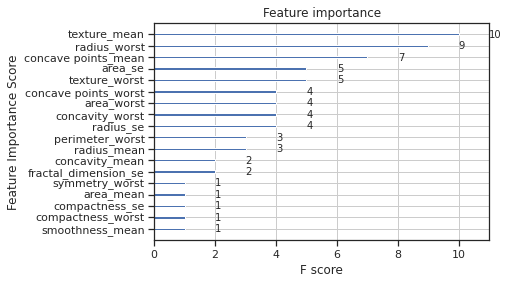

In [ ]:
# a list of features to be used for training the model
features = [x for x in X_train.columns if x not in ['id']]

# evaluating the first model
evaluate_model(xgb0, X_train, y_train, features)

Interpreting evaluation output<a class="anchor" id="bullet-21"></a>

* The first set of readings shows you the cross-validation scores at each boosting round. So at line [0], one tree has been fit to the data. Train-auc gives you the average AUC score for the five training sets during cross-validation, and test-auc gives you the same metric for the five testing sets during cross validation. Naturally, the test score is lower, as the model is predicting on data that was not used to train it. You can see that the test-auc catches up with more boosting rounds, as more trees are used to minimize the error.
<br/><br/>
* The model stops training after ten rounds, which means that the cross-validation scores are not significantly improving with more than 10 rounds. For a learning rate of 0.1, you can take the number of estimators to be 10 to save computation time.
<br/><br/>
* Overall, the accuracy is 0.9824, which tells you how many cases were correctly classified, both benign and malignant.
<br/><br/>
* Overall, the AUC score is 0.99877, which indicates that the model rarely lets malignant cases slip through its screening process.
<br/><br/>
* The graph displays the features ranked by their importance to the model. Feature importance refers to the number of times it is used as a splitting feature in the decision trees. This function is especially useful in large datasets, where many variables are just noise and <a href="https://en.wikipedia.org/wiki/Feature_engineering" target="_blank" rel="noopener no referrer">feature engineering</a> may be required.


Menafsirkan keluaran evaluasi <a class="anchor" id="bullet-21"> </a>

* Kumpulan pembacaan pertama menunjukkan kepada Anda skor validasi silang di setiap babak peningkatan. Jadi pada baris [0], satu pohon sudah sesuai dengan data. Train-auc memberi Anda skor AUC rata-rata untuk lima set pelatihan selama validasi silang, dan test-auc memberi Anda metrik yang sama untuk lima set pengujian selama validasi silang. Secara alami, skor tes lebih rendah, karena model memprediksi data yang tidak digunakan untuk melatihnya. Anda dapat melihat bahwa test-auc mengejar dengan lebih banyak putaran pendorong, karena lebih banyak pohon digunakan untuk meminimalkan kesalahan.
<br/> <br/>
* Model berhenti berlatih setelah sepuluh putaran, yang berarti bahwa skor validasi silang tidak meningkat secara signifikan dengan lebih dari 10 putaran. Untuk kecepatan pemelajaran 0,1, Anda dapat menggunakan jumlah penduga menjadi 10 untuk menghemat waktu komputasi.
<br/> <br/>
* Secara keseluruhan, keakuratannya adalah 0,9824, yang memberi tahu Anda berapa banyak kasus yang diklasifikasikan dengan benar, baik jinak maupun ganas.
<br/> <br/>
* Secara keseluruhan, skor AUC adalah 0,99877, yang menunjukkan bahwa model tersebut jarang membiarkan kasus ganas lolos dari proses penyaringannya.
<br/> <br/>
* Grafik menampilkan fitur yang diberi peringkat berdasarkan kepentingannya bagi model. Tingkat kepentingan fitur mengacu pada berapa kali digunakan sebagai fitur pemisahan dalam pohon keputusan. Fungsi ini berguna terutama dalam kumpulan data besar, di mana banyak variabel hanyalah noise dan <a href="https://en.wikipedia.org/wiki/Feature_engineering" target="_blank" rel="noopener no referrer"> rekayasa fitur </a> mungkin diperlukan.



---

# <center> To Be Continue

---



# Here

## B. Tuning max depth and child weight

**max depth**: The size of each new decision tree. Smaller trees = less complexity. <br/>
**min child weight**: The minimum number of observations that must be in the children after a split. Smaller weight = more conservative.

Bahan Bacaan:
* Grid search

To tune the remaining XGBoost parameters, use grid search with cross-validation.

Define set of values for the parameter in question. These values of interest again depend on the nature of the data and your experience.
The grid search function systematically produces a model for each unique combination of these values, and evaluates it using cross-validation.
The optimal parameter values are found in the model with the highest cv score.



In [ ]:
# updating our default model with the optimal number of estimators
xgb1 = XGBClassifier(
 objective = 'binary:logistic',
 learning_rate =0.1,
 n_estimators=10)

# array of values for max_depth and min_child_weight parameters
param_test1 = {'max_depth':range(3,7,1),'min_child_weight':range(1,3,1)}

# grid search with cross-validation using the updated model and parameter value array 
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='roc_auc',iid=False, cv=5)
gsearch1.fit(X_train[features],y_train['diagnosis'])
gsearch1.cv_results_['params'], gsearch1.best_params_, gsearch1.best_score_

([{'max_depth': 3, 'min_child_weight': 1},
  {'max_depth': 3, 'min_child_weight': 2},
  {'max_depth': 4, 'min_child_weight': 1},
  {'max_depth': 4, 'min_child_weight': 2},
  {'max_depth': 5, 'min_child_weight': 1},
  {'max_depth': 5, 'min_child_weight': 2},
  {'max_depth': 6, 'min_child_weight': 1},
  {'max_depth': 6, 'min_child_weight': 2}],
 {'max_depth': 5, 'min_child_weight': 2},
 0.9829205366357069)

The grid search found that the model works best with a max depth of 5, and a minimum child weight of 2. You can update our model accordingly and continue tuning.

## C. Tuning gamma

Increasing gamma makes the algorithm more conservative (less prone to overfitting).

In [ ]:
# updating our current model with the max_depth and min_child weight parameter values found in last grid search
xgb2 = XGBClassifier(
 objective='binary:logistic',
 learning_rate =0.1,
 n_estimators=10,
 max_depth=5,
 min_child_weight=2,
 gamma=0)

# array of values for the gamma parameter
gamma_test = {'gamma':[i/100.0 for i in range(0,6)]}

# grid search with cross-validation using the updated model and gamma value array 
gsearch2 = GridSearchCV(estimator = xgb2, param_grid = gamma_test, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X_train[features],y_train['diagnosis'])
gsearch2.cv_results_['params'], gsearch2.best_params_, gsearch2.best_score_

([{'gamma': 0.0},
  {'gamma': 0.01},
  {'gamma': 0.02},
  {'gamma': 0.03},
  {'gamma': 0.04},
  {'gamma': 0.05}],
 {'gamma': 0.03},
 0.9832301341589267)

The grid search found that the model works best when gamma is 0.03.

### Evaluating updated model

Revisit your evaluation function to see if you need to update the number of boosting rounds. Use the parameter values found for max_depth, min_child_weight, and gamma, and set the number of estimators as 30 to see when it stops running.

[0]	train-auc:0.991262+0.00415659	test-auc:0.946294+0.0345051
[1]	train-auc:0.994621+0.00305501	test-auc:0.957756+0.0276168
[2]	train-auc:0.995222+0.00271398	test-auc:0.959676+0.0263217
[3]	train-auc:0.996267+0.00253939	test-auc:0.964516+0.0208037
[4]	train-auc:0.997576+0.00194061	test-auc:0.971918+0.0146403
[5]	train-auc:0.998328+0.000817829	test-auc:0.973667+0.0151064
[6]	train-auc:0.998653+0.000721709	test-auc:0.977446+0.0136371
[7]	train-auc:0.998747+0.000665641	test-auc:0.978145+0.0139851
[8]	train-auc:0.998826+0.00072572	test-auc:0.979183+0.0134154
[9]	train-auc:0.999054+0.000430744	test-auc:0.98039+0.013054
[10]	train-auc:0.999119+0.000471885	test-auc:0.980871+0.0135194
[11]	train-auc:0.999183+0.000410013	test-auc:0.981016+0.0137015
[12]	train-auc:0.999287+0.000328012	test-auc:0.981277+0.0140524
[13]	train-auc:0.999364+0.000266412	test-auc:0.982261+0.0137598
[14]	train-auc:0.999358+0.000267429	test-auc:0.982305+0.0138369
[15]	train-auc:0.999383+0.000249224	test-auc:0.982511+0.01

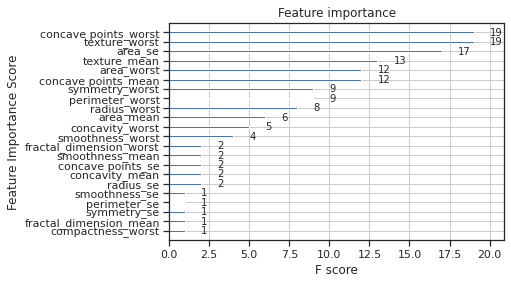

In [ ]:
xgb_check = XGBClassifier(
 objective='binary:logistic',
 learning_rate =0.1,
 n_estimators=30,
 max_depth=5,
 min_child_weight=2,
 gamma=0.03)

evaluate_model(xgb_check, X_train, y_train, features)

## D. Tuning sampling parameters

**subsample**: The ratio of data that is randomly selected for growing trees<br/>
**colsample_bytree**: The ratio of the subsample from which the algorithm selects splitting features

**Note:** You have reduced your data set several times now; originally, you divided it into 80/20 train and test sets. You input only the training set to XGBoost, which are segmented twice more by subsample and colsample. Perhaps less than 50% of the original data will be used to train the model, reducing the chance of overfitting and improving the model's ability to generalize. It is one of the reasons why you see a better test score for XGBoost compared to the single decision tree model. 

In [ ]:
# updating our current model with the most recent n_estimators
xgb3 = XGBClassifier(
 objective='binary:logistic',
 learning_rate =0.1,
 n_estimators=23,
 max_depth=5,
 min_child_weight=2,
 gamma=0.03)

# array of values for subsample and colsample_bytree parameters
sample_test = {
 'subsample':[i/10.0 for i in range(5,9)],
 'colsample_bytree':[i/10.0 for i in range(5,9)]
}

# grid search with cross validation for sampling parameters
gsearch3 = GridSearchCV(estimator = xgb3, param_grid = sample_test, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X_train[features],y_train['diagnosis'])
gsearch3.cv_results_['params'], gsearch3.best_params_, gsearch3.best_score_

([{'colsample_bytree': 0.5, 'subsample': 0.5},
  {'colsample_bytree': 0.5, 'subsample': 0.6},
  {'colsample_bytree': 0.5, 'subsample': 0.7},
  {'colsample_bytree': 0.5, 'subsample': 0.8},
  {'colsample_bytree': 0.6, 'subsample': 0.5},
  {'colsample_bytree': 0.6, 'subsample': 0.6},
  {'colsample_bytree': 0.6, 'subsample': 0.7},
  {'colsample_bytree': 0.6, 'subsample': 0.8},
  {'colsample_bytree': 0.7, 'subsample': 0.5},
  {'colsample_bytree': 0.7, 'subsample': 0.6},
  {'colsample_bytree': 0.7, 'subsample': 0.7},
  {'colsample_bytree': 0.7, 'subsample': 0.8},
  {'colsample_bytree': 0.8, 'subsample': 0.5},
  {'colsample_bytree': 0.8, 'subsample': 0.6},
  {'colsample_bytree': 0.8, 'subsample': 0.7},
  {'colsample_bytree': 0.8, 'subsample': 0.8}],
 {'colsample_bytree': 0.7, 'subsample': 0.8},
 0.9908152734778121)

The grid search found that the model works best with a colsample_bytree of 0.5, and a subsample of 0.7.

## E. Tuning lambda and alpha

Lambda and alpha are both regularization parameters, which mathematically reduce the impact of features that might be too dominant in the model. The difference between the two is in how they apply these penalties.

**lambda**: Applies L2 regularization, which shrinks the weights of all selected features equally. The default value is 0. <br/>
**alpha**: Applies L1 regularization, which can shrink the weights down to 0 - essentially discarding features that have little impact on the model. The default is 1.

These parameters have more significant effects on large models (with more features). Tune them to see how it impacts your model.

In [ ]:
# updating our current model with the sampling parameters found in the last grid search
xgb4 = XGBClassifier(
 objective='binary:logistic',
 learning_rate =0.1,
 n_estimators=23,
 max_depth=5,
 min_child_weight=2,
 gamma=0.03, 
 subsample=0.7,
 colsample_bytree=0.5)

# array of values for subsample and colsample_bytree parameters
reg_test = {'reg_alpha':[0, 0.01, 0.1], 'reg_lambda':[1, 1.1, 1.2, 1.3]}

# grid search with cross validation for regularization parameters
gsearch4 = GridSearchCV(estimator = xgb4, param_grid = reg_test, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X_train[features],y_train['diagnosis'])
gsearch4.cv_results_['params'], gsearch4.best_params_, gsearch4.best_score_

([{'reg_alpha': 0, 'reg_lambda': 1},
  {'reg_alpha': 0, 'reg_lambda': 1.1},
  {'reg_alpha': 0, 'reg_lambda': 1.2},
  {'reg_alpha': 0, 'reg_lambda': 1.3},
  {'reg_alpha': 0.01, 'reg_lambda': 1},
  {'reg_alpha': 0.01, 'reg_lambda': 1.1},
  {'reg_alpha': 0.01, 'reg_lambda': 1.2},
  {'reg_alpha': 0.01, 'reg_lambda': 1.3},
  {'reg_alpha': 0.1, 'reg_lambda': 1},
  {'reg_alpha': 0.1, 'reg_lambda': 1.1},
  {'reg_alpha': 0.1, 'reg_lambda': 1.2},
  {'reg_alpha': 0.1, 'reg_lambda': 1.3}],
 {'reg_alpha': 0.01, 'reg_lambda': 1},
 0.9896284829721363)

The grid search found that the model works best when the reg_alpha regualization is 0.01 and the reg_lambda regulization is 1.

### Evaluating final model

Run the current model through your evaluation function a final time. Compared to the model with default parameters, tuning has improved accuracy from 0.9824 to 0.9912, and the AUC score from 0.998772 to 0.999195. You can see why XGBoost is most popular for competition use, where those fourth decimal places really count!

[0]	train-auc:0.991262+0.00415659	test-auc:0.946294+0.0345051
[1]	train-auc:0.994621+0.00305501	test-auc:0.957756+0.0276168
[2]	train-auc:0.995222+0.00271398	test-auc:0.959676+0.0263217
[3]	train-auc:0.996267+0.00253939	test-auc:0.964516+0.0208037
[4]	train-auc:0.997576+0.00194061	test-auc:0.971918+0.0146403
[5]	train-auc:0.997686+0.00194212	test-auc:0.973667+0.0151064
[6]	train-auc:0.99863+0.000761627	test-auc:0.977549+0.0137967
[7]	train-auc:0.998715+0.000685681	test-auc:0.977856+0.0140668
[8]	train-auc:0.998887+0.000614441	test-auc:0.97879+0.0133742
[9]	train-auc:0.999005+0.000496548	test-auc:0.980274+0.0131517
[10]	train-auc:0.999145+0.000393217	test-auc:0.980969+0.0135316
[11]	train-auc:0.999228+0.000359222	test-auc:0.981501+0.0138705
[12]	train-auc:0.999298+0.000292906	test-auc:0.981847+0.0138087
[13]	train-auc:0.999441+0.000257661	test-auc:0.982336+0.013756

Model Report
Accuracy : 0.9912
AUC Score (Train): 0.999195
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylev

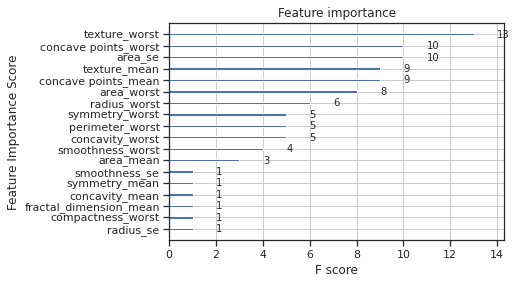

In [ ]:
# updated model with alpha value found with last grid search. (lambda does not need to be set, since default is 1)
xgb_final = XGBClassifier(
 objective='binary:logistic',
 learning_rate =0.1,
 n_estimators=30,
 max_depth=5,
 min_child_weight=2,
 gamma=0.03,
 reg_alpha=0.01)

evaluate_model(xgb_final, X_train, y_train, features)

## Predict on the test set

In [ ]:
test_features = [x for x in X_test.columns if x not in ['id']]

#Predict test set:
test_predictions = xgb_final.predict(X_test[test_features])
test_predprob = xgb_final.predict_proba(X_test[test_features])[:,1]
        
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(y_test['diagnosis'].values, test_predictions))
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test['diagnosis'], test_predprob))

Accuracy : 0.9561
AUC Score (Test): 0.981647


If you want to increase the accuracy and AUC score even further, you can restart the parameter tuning process with a smaller learning rate. The next value to try is 0.01.

## Summary
You've found out how to use a decision tree as a machine learning model to classify cancer data, and you've seen how you how tools like XGBoost can be used to tune parameters to improve the accuracy of your model.

### Learn more:
* <p id="footnote-1"><sup>[1]</sup><a id="fn1" href="https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python" target="_blank" rel="noopener noreferrer">Jain, A. (March 1, 2016) Complete Guide to Parameter Tuning in XGBoost(with codes in Python)</a>
* <a href="https://en.wikipedia.org/wiki/Feature_engineering" target="_blank" rel="noopener no referrer">Feature engineering</a>
* <a href="https://en.wikipedia.org/wiki/Decision_tree_learning#Metrics" target="_blank" rel="noopener noreferrer">Decision tree learning metrics</a>
* <a href="https://www.quora.com/Machine-Learning-What-is-an-intuitive-explanation-of-AUC" rel="noopener noreferrer">An intuitive explanation of AUC</a>
* <a href="http://www.wikihow.com/Play-20-Questions" target="_blank" rel="noopener noreferrer">How to play 20 questions</a>

* https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/93938f11-d060-498c-9ef2-d6a94131480c/view?access_token=2e8e2b2f50d16da4217401184ab3cdab9e0540384d96b73d405df7d67709e74c
* https://www.kaggle.com/vincentlugat/breast-cancer-analysis-and-prediction